In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
from pandas import DataFrame
from scipy.signal import savgol_filter

In [11]:
FLT_1 = pd.read_excel('FLT 1 datasets.xlsx')
data_x = FLT_1.iloc[:,0:7]
data_y = FLT_1.iloc[:,7:10]

y1 = data_y['Cd'].to_numpy()
y2 = data_y['Cl'].to_numpy()
y3 = data_y['Cm'].to_numpy()

y1 = savgol_filter(y1,window_length=10000, polyorder=4)
y2 = savgol_filter(y2,window_length=10000, polyorder=4)
y3 = savgol_filter(y3,window_length=10000, polyorder=4)

data_y = {'Cd':y1,
          'Cl':y2,
          'Cm':y3}

data_y = pd.DataFrame(data_y)



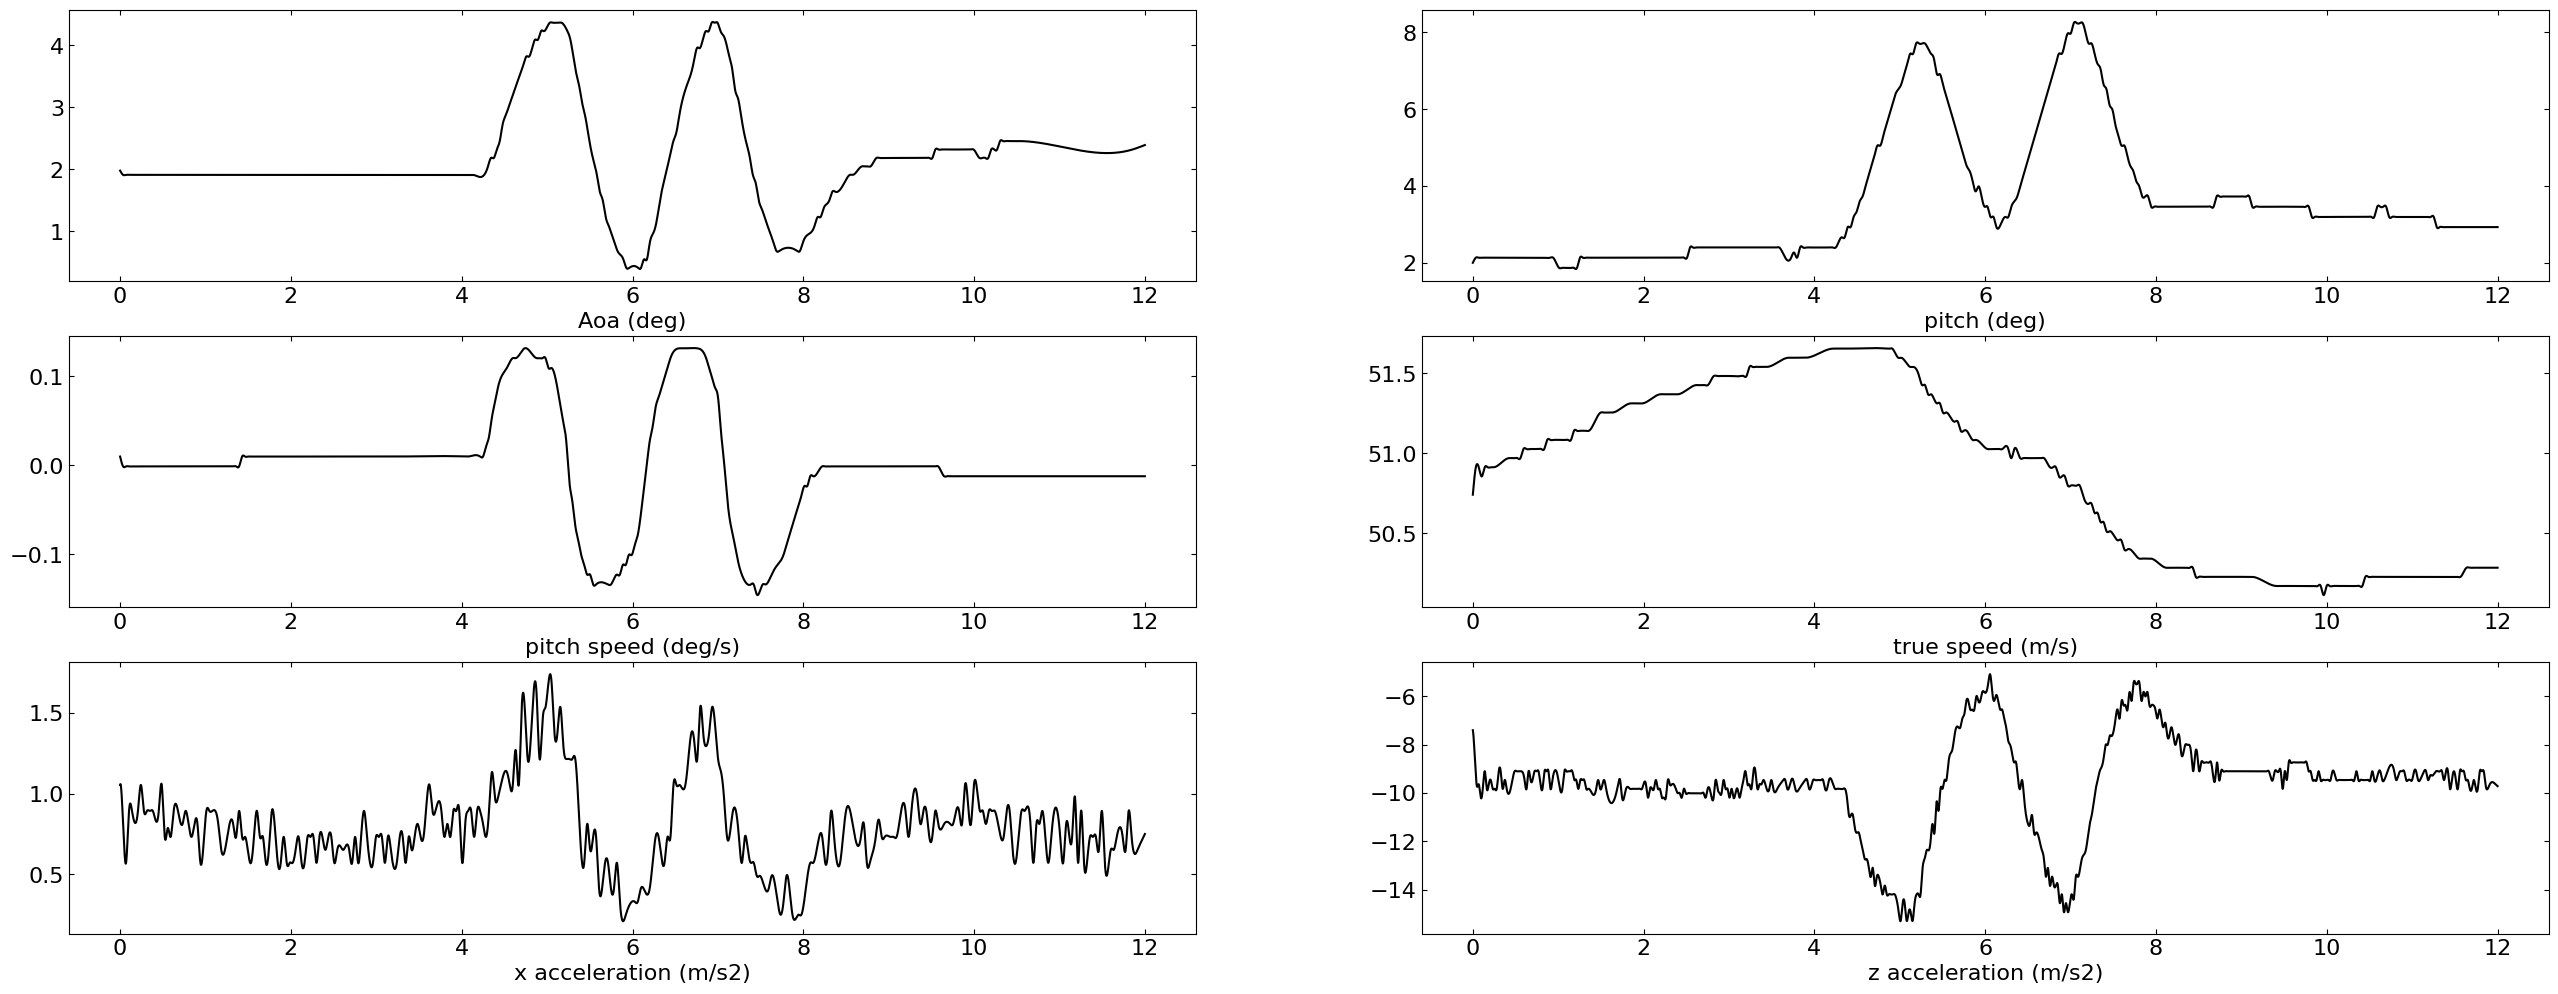

In [12]:
fig, ax = plt.subplots(3,2, figsize = (32,12))

ax[0,0].set_xlabel('Aoa (deg)', size = 16)
ax[0,0].plot(FLT_1['t(s)'],FLT_1['aoa (deg)'], color = 'black')
ax[0,0].tick_params (axis = "y", direction = "in", right = True, labelsize = 16)
ax[0,0].tick_params (axis = "x", direction = "in", top = True, labelsize = 16)

ax[0,1].set_xlabel('pitch (deg)', size = 16)
ax[0,1].plot(FLT_1['t(s)'],FLT_1['pitch (deg)'], color = 'black')
ax[0,1].tick_params (axis = "y", direction = "in", right = True, labelsize = 16)
ax[0,1].tick_params (axis = "x", direction = "in", top = True, labelsize = 16)

ax[1,0].set_xlabel('pitch speed (deg/s)' , size = 16)
ax[1,0].plot(FLT_1['t(s)'],FLT_1['pitch speed (deg/s)'], color = 'black')
ax[1,0].tick_params (axis = "y", direction = "in", right = True, labelsize = 16)
ax[1,0].tick_params (axis = "x", direction = "in", top = True, labelsize = 16)

ax[1,1].set_xlabel('true speed (m/s)' , size = 16)
ax[1,1].plot(FLT_1['t(s)'],FLT_1['true speed (m/s)'], color = 'black')
ax[1,1].tick_params (axis = "y", direction = "in", right = True, labelsize = 16)
ax[1,1].tick_params (axis = "x", direction = "in", top = True, labelsize = 16)

ax[2,0].set_xlabel('x acceleration (m/s2)',size = 16)
ax[2,0].plot(FLT_1['t(s)'],FLT_1['x acceleration (m/s2)'], color = 'black')
ax[2,0].tick_params (axis = "y", direction = "in", right = True, labelsize = 16)
ax[2,0].tick_params (axis = "x", direction = "in", top = True, labelsize = 16)

ax[2,1].set_xlabel('z acceleration (m/s2)', size = 16)
ax[2,1].plot(FLT_1['t(s)'],FLT_1['z acceleration (m/s2)'], color = 'black')
ax[2,1].tick_params (axis = "y", direction = "in", right = True, labelsize = 16)
ax[2,1].tick_params (axis = "x", direction = "in", top = True, labelsize = 16)

plt.show()


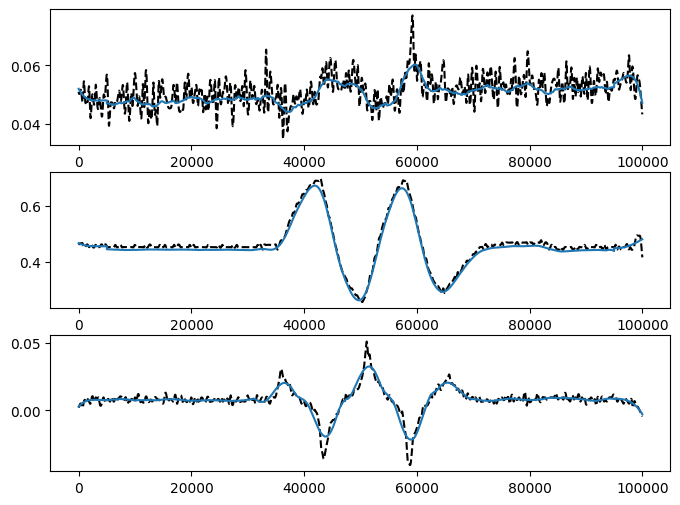

In [13]:
fig, ax = plt.subplots(3, figsize = (8,6))
ax[0].plot(FLT_1['Cd'], 'k--')
ax[0].plot(data_y['Cd'])
ax[1].plot(FLT_1['Cl'], 'k--')
ax[1].plot(data_y['Cl'])
ax[2].plot(FLT_1['Cm'], 'k--')
ax[2].plot(data_y['Cm'])



In [14]:
x = data_x[0:(len(data_x)-1)]
y = data_y[1:(len(data_y))]

x_main, x_test, y_main, y_test = train_test_split (x,y, test_size=10000)
x_training, x_validation, y_training, y_validation = train_test_split(x_main,y_main, test_size=10000)
print(x_test.shape)
print(y_test.shape)

print(x_validation.shape)
print(y_validation.shape)

print(x_training.shape)
print(y_training.shape)

time = pd.DataFrame(x_test['t(s)']).sort_index(axis = 0)

x_test = DataFrame.sort_index(x_test, ignore_index= True).drop(columns = 't(s)')
y_test = DataFrame.sort_index(y_test, ignore_index= True)

x_validation = DataFrame.sort_index(x_validation, ignore_index= True).drop(columns = 't(s)')
y_validation = DataFrame.sort_index(y_validation, ignore_index= True)

x_training = DataFrame.sort_index(x_training, ignore_index= True).drop(columns = 't(s)')
y_training = DataFrame.sort_index(y_training, ignore_index= True)

y_test = y_test[0:len(y_test)].to_numpy()
x_test = x_test[0:len(x_test)].to_numpy()

x_validation = x_validation[0:len(x_validation)].to_numpy()
y_validation = y_validation[0:len(y_validation)].to_numpy()

x_training = x_training[0:len(x_training)].to_numpy()
y_training = y_training[0:len(y_training)].to_numpy()


(10000, 7)
(10000, 3)
(10000, 7)
(10000, 3)
(79999, 7)
(79999, 3)


In [16]:

model = keras.Sequential([
    keras.layers.Dense(6 , input_shape= (6,)),
    keras.layers.Dense(7 ,activation = "sigmoid"),
    keras.layers.Dense(3 ,activation = "linear",),
])
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['RootMeanSquaredError']
               )

history = model.fit(x_training, y_training, validation_data=[x_validation, y_validation], epochs = 100, batch_size=100)
model.summary()




Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.0950 - root_mean_squared_error: 0.3083 - val_loss: 0.0263 - val_root_mean_squared_error: 0.1622
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.0091 - root_mean_squared_error: 0.0952 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0469
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0016 - root_mean_squared_error: 0.0402 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0375
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0013 - root_mean_squared_error: 0.0354 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0338
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - val_loss: 9.8090e-04 - val_root_mean_squared_error: 0.0313
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 9.2080e-04 - root_mean_squared_error: 0.0303 - val_loss:

In [17]:
model_2 = keras.Sequential([
    keras.layers.Dense(6 , input_shape= (6,)),
    keras.layers.Dense(7 ,activation = "tanh"),
    keras.layers.Dense(3 ,activation = "linear",),
])
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model_2.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['RootMeanSquaredError']
               )

history_2 = model_2.fit(x_training, y_training, validation_data=[x_validation, y_validation], epochs = 100, batch_size=100)
model_2.summary()



Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 1.0832 - root_mean_squared_error: 1.0408 - val_loss: 0.6019 - val_root_mean_squared_error: 0.7758
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3372 - root_mean_squared_error: 0.5806 - val_loss: 0.1566 - val_root_mean_squared_error: 0.3957
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0772 - root_mean_squared_error: 0.2779 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1655
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.0118 - root_mean_squared_error: 0.1085 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0635
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0027 - root_mean_squared_error: 0.0520 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0477
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.0022 - root_mean_squared_error: 0.0470 - val_loss: 0.0022 

KeyboardInterrupt: 

# Traibiig
## kontol

$\lambda = 5$

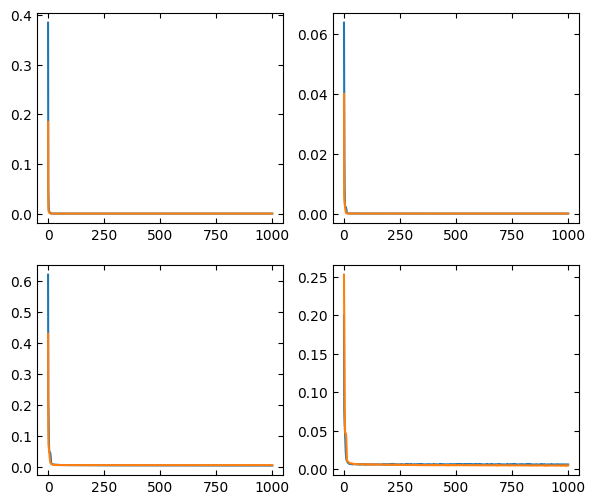

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (7,6))

ax[0,0].plot(history.history['loss'])
ax[0,0].plot(history_2.history['loss'])
ax[0,0].tick_params (axis = "x", direction = "in", top = True)
ax[0,0].tick_params (axis = "y", direction = "in", right = True)


ax[0,1].plot(history.history['val_loss'])
ax[0,1].plot(history_2.history['val_loss'])
ax[0,1].tick_params (axis = "x", direction = "in", top = True)
ax[0,1].tick_params (axis = "y", direction = "in", right = True)

ax[1,0].plot(history.history['root_mean_squared_error'])
ax[1,0].plot(history_2.history['root_mean_squared_error'])
ax[1,0].tick_params (axis = "x", direction = "in", top = True)
ax[1,0].tick_params (axis = "y", direction = "in", right = True)

ax[1,1].plot(history_2.history['val_root_mean_squared_error'])
ax[1,1].plot(history.history['val_root_mean_squared_error'])
ax[1,1].tick_params (axis = "x", direction = "in", top = True)
ax[1,1].tick_params (axis = "y", direction = "in", right = True)


plt.show()



In [ ]:
x1 = x[0:750]
y1 = y[0:750]

zm = ax[0,0].inset_axes([0.4,0.5,0.5,0.5])
zm.plot(x1,y1)

In [ ]:
y_pred = model.predict(x_test)
y_pred_2 = model_2.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
FLT_1_Sigmoid = DataFrame(y_pred, columns=['Cd','Cl','Cm'])
FLT_1_Sigmoid.to_excel(excel_writer='FLT 1 sigmoid prediction.xlsx')
FLT_1_Tanh = DataFrame(y_pred_2, columns=['Cd','Cl','Cm'])
FLT_1_Sigmoid.to_excel(excel_writer='FLT 1 tanh prediction.xlsx')


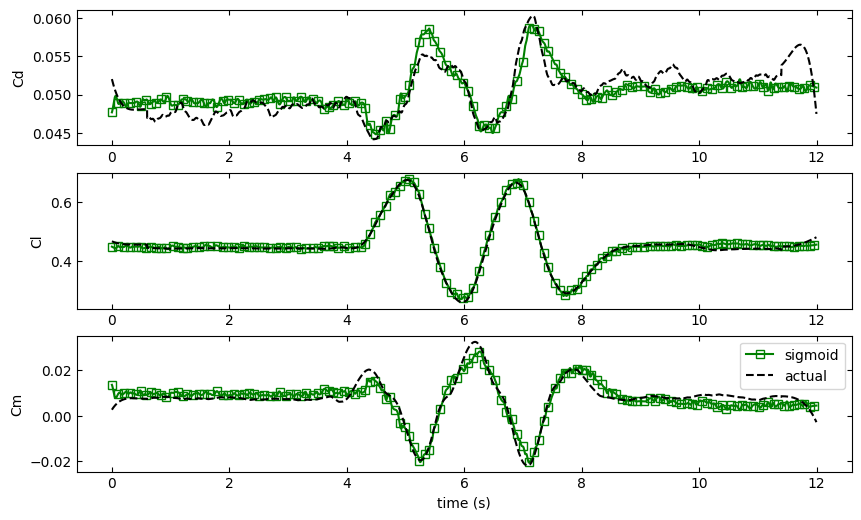

In [ ]:

fig, ax = plt.subplots (3, figsize =(10,6) )
ax[0].set_ylabel('Cd')
ax[0].plot(time, y_pred[:,0], color = 'green', marker = 's', markerfacecolor = 'none' ,markevery = 75, label = 'sigmoid')
ax[0].plot(time, y_test[:,0], 'k--', label = 'actual')

ax[1].set_ylabel('Cl')
ax[1].plot(time, y_pred[:,1], color = 'green', marker = 's', markerfacecolor = 'none' ,markevery = 75, label = 'sigmoid')
ax[1].plot(time, y_test[:,1], 'k--', label = 'actual')

ax[2].set_ylabel('Cm')
ax[2].set_xlabel('time (s)')
ax[2].plot(time, y_pred[:,2], color = 'green', marker = 's', markerfacecolor = 'none' ,markevery = 75, label = 'sigmoid')
ax[2].plot(time, y_test[:,2], 'k--', label = 'actual')

ax[0].tick_params (axis = "x", direction = "in", top = True)
ax[0].tick_params (axis = "y", direction = "in", right = True)
ax[1].tick_params (axis = "x", direction = "in", top = True)
ax[1].tick_params (axis = "y", direction = "in", right = True)
ax[2].tick_params (axis = "x", direction = "in", top = True)
ax[2].tick_params (axis = "y", direction = "in", right = True)

plt.legend()
plt.show()


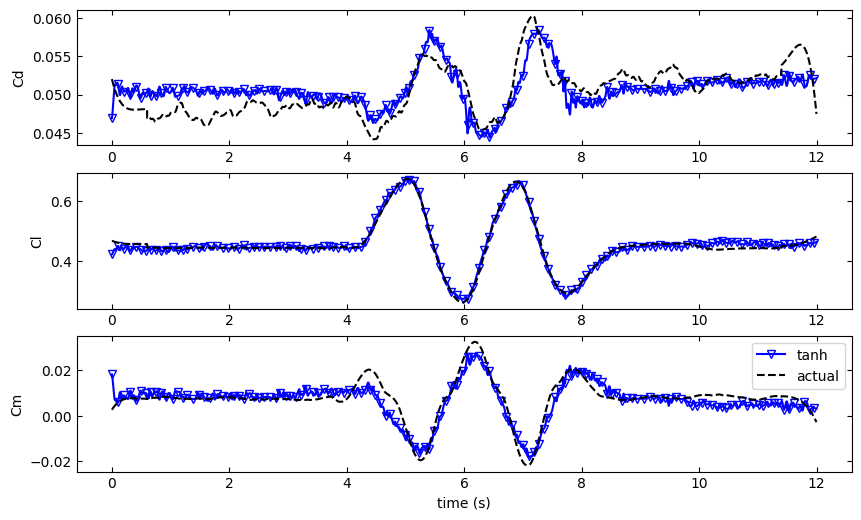

In [ ]:
fig, ax = plt.subplots (3, figsize =(10,6) )

ax[0].set_ylabel('Cd')
ax[0].plot(time, y_pred_2[:,0], color = 'blue', marker = 'v', markerfacecolor = 'none',markevery = 75, label = 'tanh')
ax[0].plot(time, y_test[:,0], 'k--', label = 'actual')

ax[1].set_ylabel('Cl')
ax[1].plot(time, y_pred_2[:,1], color = 'blue', marker = 'v', markerfacecolor = 'none',markevery = 75, label = 'tanh')
ax[1].plot(time, y_test[:,1], 'k--', label = 'actual')

ax[2].set_ylabel('Cm')
ax[2].set_xlabel('time (s)')
ax[2].plot(time, y_pred_2[:,2], color = 'blue', marker = 'v', markerfacecolor = 'none',markevery = 75, label = 'tanh')
ax[2].plot(time, y_test[:,2], 'k--', label = 'actual')

ax[0].tick_params (axis = "x", direction = "in", top = True)
ax[0].tick_params (axis = "y", direction = "in", right = True)
ax[1].tick_params (axis = "x", direction = "in", top = True)
ax[1].tick_params (axis = "y", direction = "in", right = True)
ax[2].tick_params (axis = "x", direction = "in", top = True)
ax[2].tick_params (axis = "y", direction = "in", right = True)

plt.legend()
plt.show()

In [ ]:
Cd_1 = r2_score(y_test[:,0], y_pred[:,0])
Cl_1 = r2_score(y_test[:,1], y_pred[:,1])
Cm_1 = r2_score(y_test[:,2], y_pred[:,2])
Cd_2 = r2_score(y_test[:,0], y_pred_2[:,0])
Cl_2 = r2_score(y_test[:,1], y_pred_2[:,1])
Cm_2 = r2_score(y_test[:,2], y_pred_2[:,2])
Overall_1 = r2_score(y_test, y_pred)
Overall_2 = r2_score(y_test, y_pred_2)

r_squared_table = {'Activation Function': ['Sigmoid','Tanh'],
                   'Cd': [Cd_1,Cd_2],
                   'Cl': [Cl_1,Cl_2],
                   'Cm': [Cm_1,Cm_2],
                   'Overall': [Overall_1,Overall_2]}

r_squared_table = pd.DataFrame(r_squared_table)
r_squared_table

,Activation Function,Cd,Cl,Cm,Overall
0,Sigmoid,0.690414,0.990300,0.878682,0.853132
1,Tanh,0.507106,0.985175,0.815666,0.769316
